100%|██████████| 9999/9999 [00:00<00:00, 14732.91it/s]


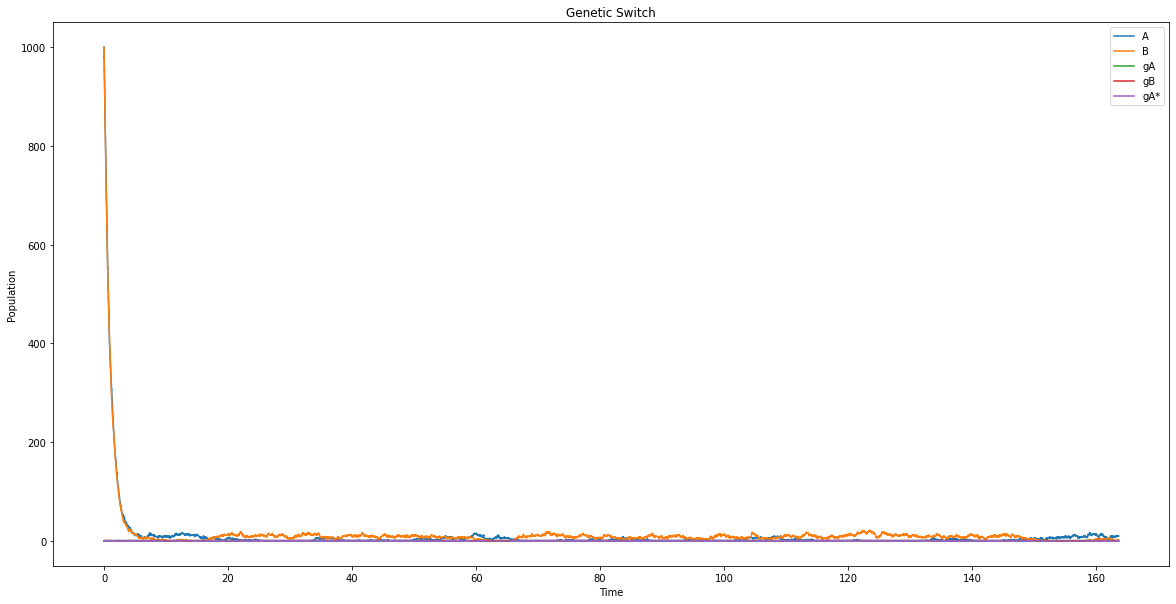

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time;

np.random.seed(int(time()));
steps = 10000 #Number of steps to be iteratted.


populations = np.array((1000,1000,1,1,0,0),dtype=int); # populations = [nA,nB,gA,gB,gA*,gB*]
rates = np.array((1,10,20,15),dtype=float) #rates = [kd,kp,kf,kr]

time = np.zeros(steps, dtype=float); # Store the time steps
storeP = np.zeros((steps,6),dtype=int); # Store all the populations at all time steps in 2D array.
storeP[0] = populations; #Store the initial population at step 0 

propensities = np.zeros((8),dtype=float); #Store the propensities


#Defining all the propensities:
def prop(populations,propensities):
    propensities[0]=populations[0]*rates[0]; #A->0 (kd)
    propensities[1]=populations[2]*rates[1]; #gA->gA+A (kp)
    propensities[2]=populations[2]*populations[1]*rates[2]; #gA+B->gA* (kf)
    propensities[3]=populations[4]*rates[3]; #gA*->gA+B (kr)
    propensities[4]=populations[1]*rates[0]; #B->0 (kd)
    propensities[5]=populations[3]*rates[1]; #gB -> gB +B(kp)
    propensities[6]=populations[3]*populations[0]*rates[2] #gB+A->gB* (kf)
    propensities[7]=populations[5]*rates[3]; #gB*->gB+B (kr)
    return propensities

def reaction(populations,choice):
    if choice == 0: #A->0 (kd)
        populations[0]-=1; #Only A is decreasing by 1
    if choice == 1: #gA->gA+A (kp)
        populations[0]+=1; #Only A is increasing by 1
    if choice == 2: #gA+B->gA* (kf)
        populations[1] -=1; #B decreasing
        populations[2] -=1; #gA decreasing
        populations[4] +=1; #gA* increasing
    if choice == 3: #gA*->gA+B (kr)
        populations[4] -=1; #gA* decreasing
        populations[2] +=1; #gA increasing
        populations[1] +=1; #B increasing
        
    if choice == 4: #B->0 (kd)
        populations[1] -=1 #Only B is decreasing
    if choice == 5:#gB -> gB +B(kp)
        populations[1] +=1 #Only B is increasing
    if choice == 6: #gB+A->gB* (kf)
        populations[3] -=1 #gB decreasing
        populations[0] -=1 #A is decreasing
        populations[5] +=1 #gB* increasing
    if choice == 7: #gB*->gB+B (kr)
        populations[3] +=1 #gB increasing
        populations[0] +=1 #A is increasing
        populations[5] -=1 #gB* is decreasing
    return populations

if __name__ == "__main__":
    for i in tqdm(range(1,steps)):
        propensities = prop(populations,propensities); #Calculate propensities for all the reactions
        if populations[2]+populations[4] >1:
            print("something wrong ")
        if populations[3]+populations[5]>1:
            print("something wrong")
        if populations[4] ==1: #can't have a gB* when we already have a gA*
            propensities[6]=0 #setting production of gB* to 0
        if populations[5]==1: #can't have gA* when gB* =1
            propensities[2]=0 #setting production of gA* to 0
        sumProp = np.sum(propensities); # sum of all the propensities
        maxTime = 1.0/sumProp; # Maximum time.
        tau = np.random.exponential(maxTime); # Holding time sampled from an exponential distribution.
        choice = np.random.choice(8,1,p=propensities/sumProp); # Making choice for the reaction to be evaluated
        populations = reaction(populations,choice); # Update the population based on the choice made above.
        time[i] = time[i-1]+tau; #Store the time.
        storeP[i]=populations#Store all the populations at step i

    storeP = storeP.transpose();
    plt.figure(figsize=(20,10))
    for i in range(5):
        plt.plot(time,storeP[i]);
    plt.title("Genetic Switch");
    plt.xlabel("Time");
    plt.ylabel("Population");
    plt.legend(["A","B","gA","gB","gA*","gB*"]);
    plt.savefig("geneticSwitch-large2.png",dpi=100);
    plt.show()

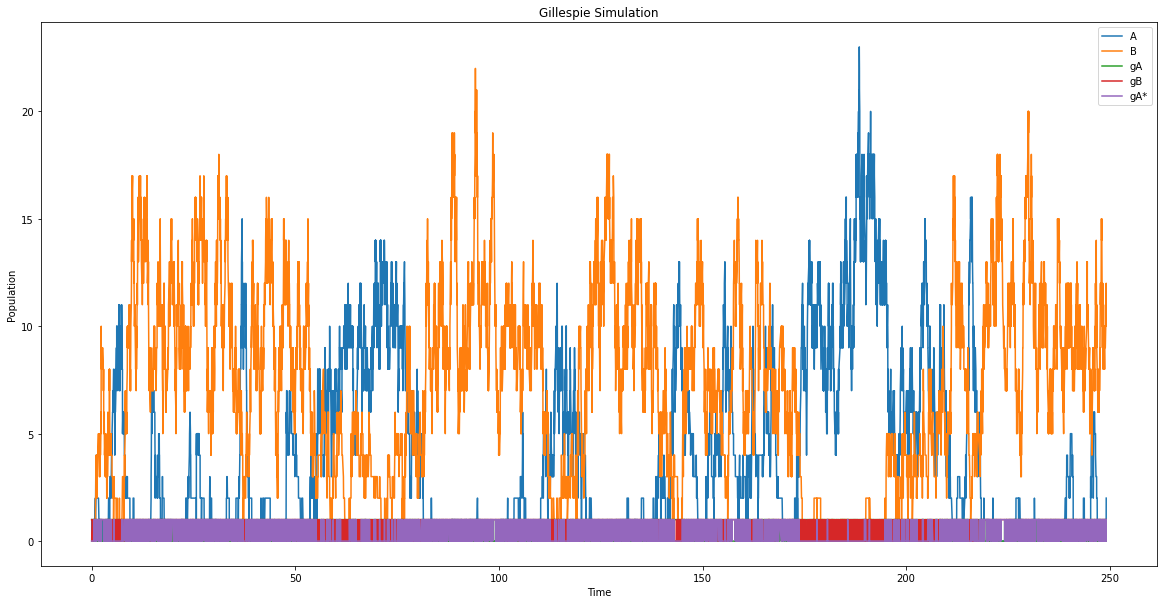

In [25]:
# storeP = storeP.transpose();
plt.figure(figsize=(20,10))
for i in range(5):
    plt.plot(time,storeP[i]);
plt.title("Gillespie Simulation");
plt.xlabel("Time");
plt.ylabel("Population");
plt.legend(["A","B","gA","gB","gA*","gB*"]);
plt.savefig("genticS.png",dpi=300);
plt.show()

In [3]:
from time import sleep;
pbar = tqdm(total=100);
i=0
while i<100:
    i+=1
    sleep(0.1)
    pbar.update(1)
pbar.close()

100%|██████████| 100/100 [00:10<00:00,  9.85it/s]


In [7]:
p=[0];
if p==0:
    print("Something");
else:
    print("Things looks fine")

Things looks fine


In [41]:
!git pull;git add .; git commit -m "Assignment 3"; git push

Already up to date.
[main e8f95a9] Assignment 3
 3 files changed, 48 insertions(+), 24 deletions(-)
 create mode 100644 a3/geneticSwitch-large.png
 create mode 100644 a3/geneticSwitch-large2.png
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 48 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 164.43 KiB | 2.49 MiB/s, done.
Total 6 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:Subhajit-Roy-Partho/presse-homework.git
   75698b0..e8f95a9  main -> main
